# 10720PHYS401200 Homework-3

## Finite size scaling of the 2D Ising model

Write a program/function to perform a Monte Carlo simulation of the 2D Ising model in zero magnetic field.

$$
  H = -J \sum_{\langle i,j\rangle} \sigma_i \sigma_j,
$$

where $\sigma=\pm 1$ and the sum is over nearest-neighbor pairs of sites on a square lattice of $N = L \times L$ sites.

### Environment Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Ising Model Class

In [2]:
class Ising_model:

    kb = 1  #1.38064852e-23

    def __init__(self, L, T):
        self.L = L
        self.T = T
        spin_conf = np.zeros((L, L))
        for i in range(L):
            for j in range(L):
                spin = np.random.randint(-1, 2)
                while spin == 0:
                    spin = np.random.randint(-1, 2)
                spin_conf[i][j] = spin
        self.s = spin_conf

    def visual(self, verbose=True):
        L = self.L
        demo = np.zeros(np.shape(self.s), dtype=str)
        num_up, num_down = 0, 0
        for i in range(L):
            for j in range(L):
                if self.s[i][j] == 1.0:
                    demo[i][j] = '↑'
                    num_up += 1
                elif self.s[i][j] == -1.0:
                    demo[i][j] = '↓'
                    num_down += 1
        print(demo)
        if verbose == True:
            print('Spin_up=%i ;Spin_down=%i' % (num_up, num_down))

    def energy(self):
        L = self.L
        E = 0
        J = 1
        for i in range(L):
            for j in range(L):
                E += self.s[i, j] * (self.s[(i + 1) % L, j] +
                                     self.s[i, (j + 1) % L])
        energy = -J * E
        return energy

    def magnet(self):
        L = self.L
        M = 0.0
        for i in range(L):
            for j in range(L):
                M += self.s[i, j]
        return M

    def dE(self, i, j):
        L = self.L
        NB = self.s[(i + 1) % L, j] + self.s[i, (j + 1) % L] + self.s[
            (i - 1) % L, j] + self.s[i, (j - 1) % L]
        dE = 2 * self.s[i, j] * NB
        return dE

    def mc_method_sq(self, verbose1=False, verbose2=False):
        '''
        verbose1: print out spin configuration after site by site 
        verbose2: print out spin configuration after one monte carlo sweep
        '''
        T = self.T
        kb = self.kb
        L = self.L
        accept = 0
        beta = 1 / T / kb
        for i in range(L):
            for j in range(L):
                if self.dE(i, j) < 0:
                    self.s[i][j] *= -1
                    accept += 1
                elif self.dE(i, j) >= 0:
                    prob = np.exp(-beta * self.dE(i, j))
                    if np.random.random() < prob:
                        self.s[i][j] *= -1
                        accept += 1
                if verbose1 == True:
                    print('\n[%i, %i], dE=%.1f' % (i, j, self.dE(i, j)))
                    self.visual()
        if verbose2 == True:
            print('L=%i, T=%i, Accept_rate=%.2f' %
                  (L, T, (100 * accept / L**2)) + '%')
        return self.s

    def mc_method_rnd(self, verbose1=False, verbose2=False):
        '''
        verbose1: print out spin configuration after site by site 
        verbose2: print out spin configuration after one monte carlo sweep
        '''
        T = self.T
        kb = self.kb
        L = self.L
        accept = 0
        beta = 1 / T / kb
        for n in range(L * L):
            i = np.random.randint(L)
            j = np.random.randint(L)
            if self.dE(i, j) < 0:
                self.s[i][j] *= -1
                accept += 1
            elif self.dE(i, j) >= 0:
                prob = np.exp(-beta * self.dE(i, j))
                if np.random.random() < prob:
                    self.s[i][j] *= -1
                    accept += 1
            if verbose1 == True:
                print('\n[%i, %i], dE=%.1f' % (i, j, self.dE(i, j)))
                self.visual()
        if verbose2 == True:
            print('L=%i, T=%i, Accept_rate=%.2f' %
                  (L, T, (100 * accept / L**2)) + '%')
        return self.s

    @staticmethod
    def get_diff_T_params(L, T_list, N_rnd, N_eq=100, plot=True, polarized=True):
        '''
        input: L, T_list (diff T), N_rnd
        output: C, Chi, Eng, Mag 
        '''
        Mag, Eng, C, Chi = [], [], [], []
        for T in T_list:
            sample = Ising_model(L, T)
            if polarized == True:
                sample.s = np.ones((sample.L, sample.L))
    
            for run in range(N_eq):
                sample.mc_method_rnd()

            mag, eng, mag_2, eng_2 = [], [], [], []
            for run in range(N_rnd):
                sample.mc_method_rnd()
                mag.append(abs(sample.magnet()))
                eng.append(sample.energy())
                mag_2.append(sample.magnet()**2)
                eng_2.append(sample.energy()**2)

            mean_mag = sum(mag) / len(mag)
            mean_eng = sum(eng) / len(eng)
            mean_mag_2 = sum(mag_2) / len(mag_2)
            mean_eng_2 = sum(eng_2) / len(eng_2)

            C.append(((mean_eng_2 - mean_eng**2) / sample.kb / T / T) /
                     (sample.L**2))
            Chi.append(
                ((mean_mag_2 - mean_mag**2) / sample.kb / T) / (sample.L**2))
            Eng.append(mean_eng / sample.L**2)
            Mag.append(mean_mag / sample.L**2)

        if plot == True:
            axes[0, 0].plot(T_list, Eng, '-o', label=('L=%i' % L))
            axes[0, 1].plot(T_list, C, '-o', label=('L=%i' % L))
            axes[1, 0].plot(T_list, Mag, '-o', label=('L=%i' % L))
            axes[1, 1].plot(T_list, Chi, '-o', label=('L=%i' % L))

        return C, Chi, Eng, Mag

L=2
L=4
L=8
L=16
L=32


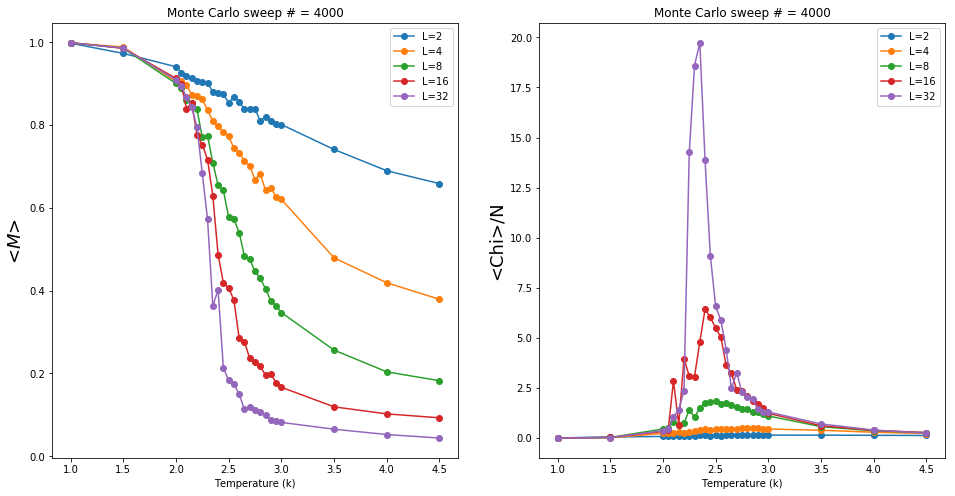

In [3]:
L_list = [2, 4, 8, 16, 32]
T_list = list(np.arange(1,2,0.5)) + list(np.arange(2,3,0.05)) + list(np.arange(3,5,0.5))

N_rnd = 4000
para_list = [r'<$M$>', '<Chi>/N']
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

Qx_max = []; Qc_max = []; M_max = []
C = np.zeros((len(L_list), len(T_list)))
Chi = np.zeros((len(L_list), len(T_list)))
Eng = np.zeros((len(L_list), len(T_list)))
Mag = np.zeros((len(L_list), len(T_list)))

for i, L in enumerate(L_list):
    print('L=%i' % L)
    C[i], Chi[i], Eng[i], Mag[i] = Ising_model.get_diff_T_params(L, T_list, N_rnd, plot=False)
    Qx_max.append(max(Chi[i]))
    Qc_max.append(max(C[i]))
    index = np.argwhere(Chi[i] == max(Chi[i]))[0][0]
    M_max.append(float(Mag[i][index]))
    
    axes[0].plot(T_list, Mag[i], '-o', label=('L=%i' % L))
    axes[1].plot(T_list, Chi[i], '-o', label=('L=%i' % L))
    for k in range(len(axes)):
        axes[k].set_ylabel(para_list[k], fontsize=18)
        axes[k].set_xlabel('Temperature (k)')
        axes[k].set_title('Monte Carlo sweep # = %i' % N_rnd)
        axes[k].legend()

np.save('C', C)
np.save('Chi', Chi)
np.save('Eng', Eng)
np.save('Mag', Mag)
np.save('Qc_max', Qc_max)
np.save('Qx_max', Qx_max)
np.save('M_max', M_max)
np.save('L_list', np.array(L_list))
np.save('T_list', np.array(T_list))
plt.savefig('Chi_&_M.png')
plt.show()

## Problem 1: Finite size scaling of the susceptibility

Calculate susceptibility per site $Q \equiv \frac{\chi}{N}$ for $L = 2,4,8,16,32$. For each size $L$, estimate the finite-size critical temperature $T_{max}(L)$ at which $Q$ attends the maximal value $Q_{max}(L)$.

* Plot $\ln Q_{max}(L)$ v.s. $\ln(L)$. Your data should more or less fall on a straight line. Plot a line with slope $\gamma=7/4$ that fits your data well. Alternatively, you can fit your data to a straight line and compare the slope you obtain with the exact exponent $\gamma=7/4$.

* For each size $L$, evaluate the value of the magnetization per site at the finite-size critical temperature, i.e., $M(T_{max}(L))$. Plot $\ln M(T_{max}(L))$ v.s. $\ln(L)$. You should again obtain more or less a straight line, with slope $-\beta=-1/8$.

* For each size $L$, Plot $Q(T,L)L^{-\gamma}$ v.s. $ (T-T_c)*L$ and show that data from all $L$ collapse into a single curve. You can use the exact $T_c=\frac{2}{\ln(1+\sqrt{2})}$.

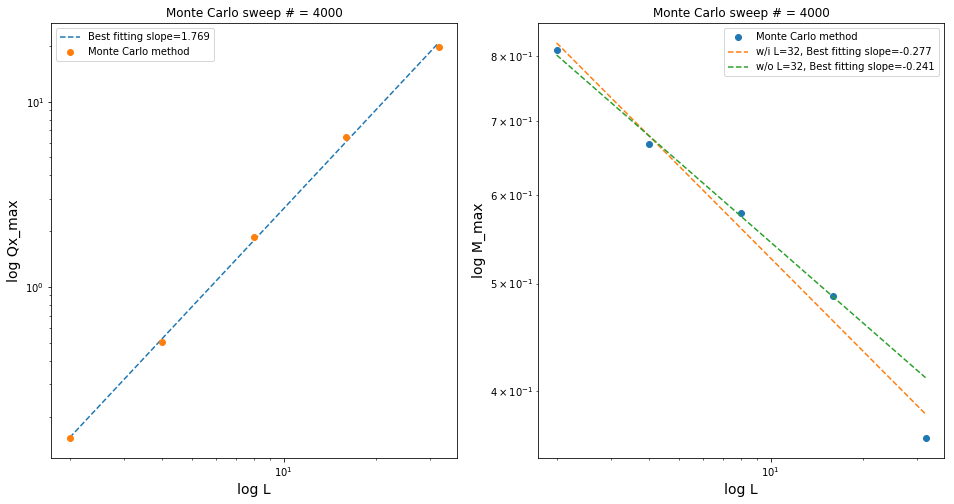

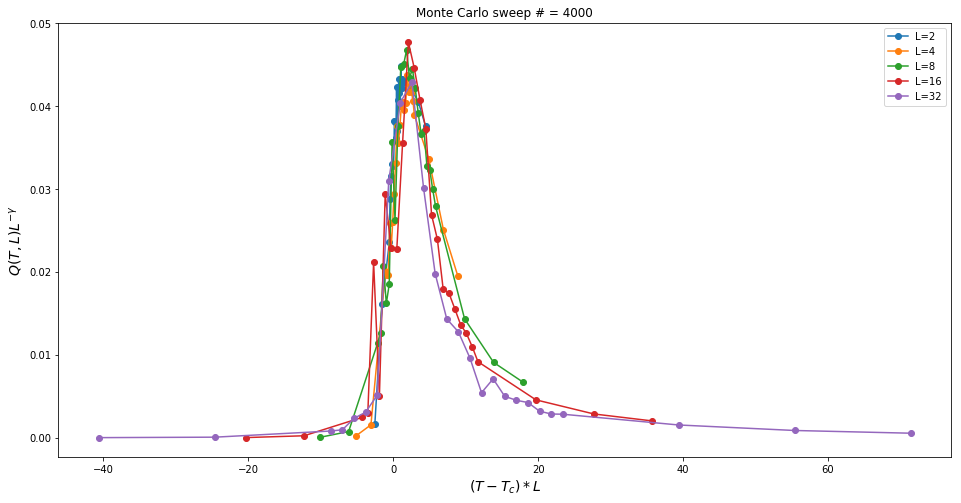

In [13]:
C = np.load('C.npy')
Chi = np.load('Chi.npy')
Eng = np.load('Eng.npy')
Mag = np.load('Mag.npy')
Qx_max = np.load('Qx_max.npy')
M_max = np.load('M_max.npy')
L_list = np.load('L_list.npy')
T_list = np.load('T_list.npy')
L_log = np.log(L_list)
Qx_log = np.log(Qx_max)
M_log = np.log(M_max)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
coeffs_1 = np.polyfit(L_log, Qx_log, deg=1)
poly = np.poly1d(coeffs_1)
gamma = poly.c[0]
yfit = lambda x: np.exp(poly(np.log(x)))
axes[0].loglog(L_list, yfit(L_list), '--', label='Best fitting slope=%.3f' % poly.c[0])
axes[0].loglog(L_list, Qx_max, 'o', label='Monte Carlo method')
axes[0].set_xlabel('log L', fontsize=14)
axes[0].set_ylabel('log Qx_max', fontsize=14)
axes[0].set_title('Monte Carlo sweep # = %i' % N_rnd)
axes[0].legend()

coeffs_2 = np.polyfit(L_log, M_log, deg=1)
poly = np.poly1d(coeffs_2)
beta = poly.c[0] * (-1)
yfit = lambda x: np.exp(poly(np.log(x)))
axes[1].loglog(L_list, M_max, 'o', label='Monte Carlo method')
axes[1].loglog(L_list, yfit(L_list), '--', label='w/i L=32, Best fitting slope=%.3f' % poly.c[0])

L_list_wo_32 = L_list[:-1]
Qx_max_wo_32 = Qx_max[:-1]
M_max_wo_32 = M_max[:-1]
coeffs_3 = np.polyfit(np.log(L_list_wo_32), np.log(M_max_wo_32), deg=1)
poly = np.poly1d(coeffs_3)
beta = poly.c[0] * (-1)
yfit = lambda x: np.exp(poly(np.log(x)))
axes[1].loglog(L_list, yfit(L_list), '--', label='w/o L=32, Best fitting slope=%.3f' % poly.c[0])

axes[1].set_xlabel('log L', fontsize=14)
axes[1].set_ylabel('log M_max', fontsize=14)
axes[1].set_title('Monte Carlo sweep # = %i' % N_rnd)
axes[1].legend()
plt.savefig('Q_L_and_M_L.png')
plt.show()

T_c = 2/np.log(1+2**0.5)
new_T_list = np.zeros((len(L_list), len(T_list)))
new_Q_list = np.zeros((len(L_list), len(T_list)))

T_arr = np.array(T_list)
for i, L in enumerate(L_list):
    new_T_list[i] = (T_arr - T_c) * L_list[i]
    new_Q_list[i] = Chi[i] * (L_list[i]**(-1*gamma))
    
fig, axes = plt.subplots(1, 1, figsize=(16, 8))
for j in range(len(L_list)):
    axes.plot(new_T_list[j], new_Q_list[j], '-o', label=('L=%i' % int(L_list[j])))

axes.set_xlabel(r'$ (T-T_c)*L$', fontsize=14)
axes.set_ylabel(r'$Q(T,L)L^{-\gamma}$', fontsize=14)
axes.set_title('Monte Carlo sweep # = %i' % N_rnd)
axes.legend()
plt.savefig('New_Q_and_New_L.png')
plt.show()

## Problem 2: Finite size scaling of the heat capacity

Calculate heat capacity per site $Q \equiv \frac{C}{N}$ for $L = 2,4,8,16,32$. For each size $L$, estimate the finite-size critical temperature $T_{max}(L)$ at which $Q$ attends the maximal value $Q_{max}(L)$.

* Plot $\ln Q_{max}(L)$ v.s. $\ln(L)$ and show that your data **does not** fall on a straight line.

* Plot $Q_{max}(L)$ v.s. $\ln(L)$. Your data should more or less fall on a straight line. Estimate the slope.

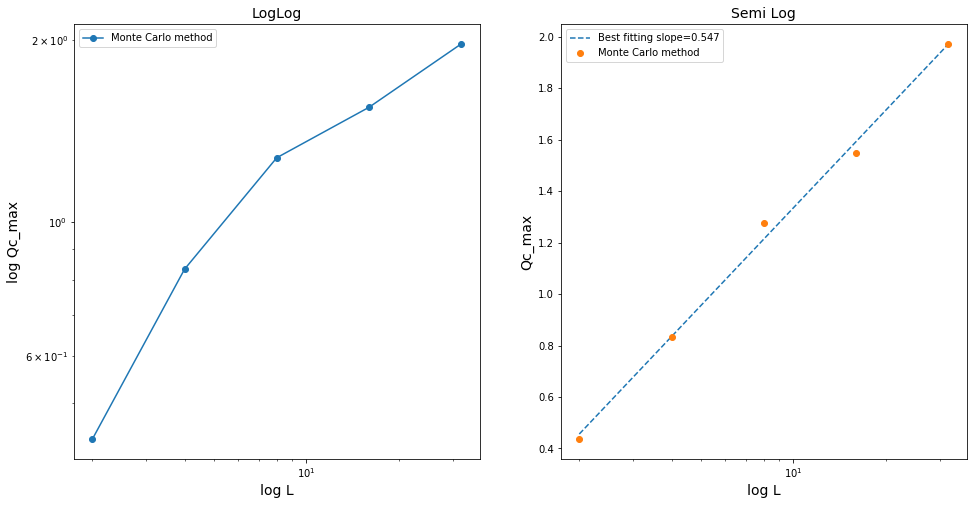

In [6]:
Qc_Max = np.load('Qc_max.npy')
L_list = np.load('L_list.npy')
Qc_log = np.log(Qc_max)
L_log = np.log(L_list)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].loglog(L_list, Qc_max, '-o', label='Monte Carlo method')
axes[0].set_xlabel('log L', fontsize=14)
axes[0].set_ylabel('log Qc_max', fontsize=14)
axes[0].set_title('LogLog', fontsize=14)
axes[0].legend()

coeffs_2 = np.polyfit(L_log, Qc_max, deg=1)
poly = np.poly1d(coeffs_2)
yfit = lambda x: poly(np.log(x))
axes[1].semilogx(L_list, yfit(L_list), '--', label='Best fitting slope=%.3f' % poly.c[0])
axes[1].semilogx(L_list, Qc_max, 'o', label='Monte Carlo method')
axes[1].set_xlabel('log L', fontsize=14)
axes[1].set_ylabel('Qc_max', fontsize=14)
axes[1].set_title('Semi Log', fontsize=14)
axes[1].legend()

plt.show()

## Problem 3: Correlation function and correlation length

Write a program/function to measure the correlation function matrix
$$
  C(\vec{r}) = \langle S_{0,0} S_{i,j} \rangle,
$$
where $\vec{r}=(i,j)$ and $i,j=1,\cdots, L$.

Define the Fourier transform of the correlaction function
$$
  S(\vec{q}=\sum_{\vec{r}} \cos(\vec{q}\cdot\vec{r}) C(\vec{r}).
$$

Define correlation length $\xi_a$ as
$$
  \xi_a = \frac{1}{q_1} \sqrt{\frac{S(0)}{S(q_1)}-1},
$$
where $q_1=(\frac{2\pi}{L},0)$.

Plot $\xi_a/L$ as a function of $T$ for $L=4,8,16$ and show that the curves corss around exact $T_c$.

In [23]:
class Ising_model:

    kb = 1  #1.38064852e-23

    def __init__(self, L, T):
        self.L = L
        self.T = T
        spin_conf = np.zeros((L, L))
        for i in range(L):
            for j in range(L):
                spin = np.random.randint(-1, 2)
                while spin == 0:
                    spin = np.random.randint(-1, 2)
                spin_conf[i][j] = spin
        self.s = spin_conf

    def visual(self, verbose=True):
        L = self.L
        demo = np.zeros(np.shape(self.s), dtype=str)
        num_up, num_down = 0, 0
        for i in range(L):
            for j in range(L):
                if self.s[i][j] == 1.0:
                    demo[i][j] = '↑'
                    num_up += 1
                elif self.s[i][j] == -1.0:
                    demo[i][j] = '↓'
                    num_down += 1
        print(demo)
        if verbose == True:
            print('Spin_up=%i ;Spin_down=%i' % (num_up, num_down))

    def energy(self):
        L = self.L
        E = 0
        J = 1
        for i in range(L):
            for j in range(L):
                E += self.s[i, j] * (self.s[(i + 1) % L, j] +
                                     self.s[i, (j + 1) % L])
        energy = -J * E
        return energy

    def magnet(self):
        L = self.L
        M = 0.0
        for i in range(L):
            for j in range(L):
                M += self.s[i, j]
        return M

    def dE(self, i, j):
        L = self.L
        NB = self.s[(i + 1) % L, j] + self.s[i, (j + 1) % L] + self.s[
            (i - 1) % L, j] + self.s[i, (j - 1) % L]
        dE = 2 * self.s[i, j] * NB
        return dE

    def mc_method_sq(self, verbose1=False, verbose2=False):
        '''
        verbose1: print out spin configuration after site by site 
        verbose2: print out spin configuration after one monte carlo sweep
        '''
        T = self.T
        kb = self.kb
        L = self.L
        accept = 0
        beta = 1 / T / kb
        for i in range(L):
            for j in range(L):
                if self.dE(i, j) < 0:
                    self.s[i][j] *= -1
                    accept += 1
                elif self.dE(i, j) >= 0:
                    prob = np.exp(-beta * self.dE(i, j))
                    if np.random.random() < prob:
                        self.s[i][j] *= -1
                        accept += 1
                if verbose1 == True:
                    print('\n[%i, %i], dE=%.1f' % (i, j, self.dE(i, j)))
                    self.visual()
        if verbose2 == True:
            print('L=%i, T=%i, Accept_rate=%.2f' %
                  (L, T, (100 * accept / L**2)) + '%')
        return self.s

    def mc_method_rnd(self, verbose1=False, verbose2=False):
        '''
        verbose1: print out spin configuration after site by site 
        verbose2: print out spin configuration after one monte carlo sweep
        '''
        T = self.T
        kb = self.kb
        L = self.L
        accept = 0
        beta = 1 / T / kb
        for n in range(L * L):
            i = np.random.randint(L)
            j = np.random.randint(L)
            if self.dE(i, j) < 0:
                self.s[i][j] *= -1
                accept += 1
            elif self.dE(i, j) >= 0:
                prob = np.exp(-beta * self.dE(i, j))
                if np.random.random() < prob:
                    self.s[i][j] *= -1
                    accept += 1
            if verbose1 == True:
                print('\n[%i, %i], dE=%.1f' % (i, j, self.dE(i, j)))
                self.visual()
        if verbose2 == True:
            print('L=%i, T=%i, Accept_rate=%.2f' %
                  (L, T, (100 * accept / L**2)) + '%')
        return self.s

    @staticmethod
    def get_diff_T_params(L, T_list, N_rnd, N_eq=100, plot=True, polarized=True):
        '''
        input: L, T_list (diff T), N_rnd, 2X2 figure (if plot is needed)
        output: C, Chi, Eng, Mag
        '''
        Mag, Eng, C, Chi = [], [], [], []; Xi = []
        for T in T_list:
            sample = Ising_model(L, T)
            if polarized == True:
                sample.s = np.ones((sample.L, sample.L))

            for run in range(N_eq):
                sample.mc_method_rnd()

            mag, eng, mag_2, eng_2 = [], [], [], []; Cor = []
            for run in range(N_rnd):
                sample.mc_method_rnd()
                mag.append(abs(sample.magnet()))
                eng.append(sample.energy())
                mag_2.append(sample.magnet()**2)
                eng_2.append(sample.energy()**2)
                Cor.append(sample.get_cor_mat())

                mean_mag = sum(mag) / len(mag)
                mean_eng = sum(eng) / len(eng)
                mean_mag_2 = sum(mag_2) / len(mag_2)
                mean_eng_2 = sum(eng_2) / len(eng_2)
                mean_Cor = np.mean(Cor, axis=0)
            
            C.append(((mean_eng_2 - mean_eng**2) / sample.kb / T / T) /
                     (sample.L**2))
            Chi.append(
                ((mean_mag_2 - mean_mag**2) / sample.kb / T) / (sample.L**2))
            Eng.append(mean_eng / sample.L**2)
            Mag.append(mean_mag / sample.L**2)
            
        if plot == True:
            axes[0, 0].plot(T_list, Eng, '-o', label=('L=%i' % L))
            axes[0, 1].plot(T_list, C, '-o', label=('L=%i' % L))
            axes[1, 0].plot(T_list, Mag, '-o', label=('L=%i' % L))
            axes[1, 1].plot(T_list, Chi, '-o', label=('L=%i' % L))

        return C, Chi, Eng, Mag
    
    # New added methods
    #=============================================================
    def get_cor_mat(self, visual=False):
        L = self.L
        CM = np.zeros((L, L))
        for i in range(L):
            for j in range(L):
                CM[i][j] = self.s[0][0] * self.s[i][j]
        if visual == True:
            print(CM)
        return CM
    #=============================================================
    @staticmethod
    def get_diff_T_cor_length(L, T_list, N_rnd, N_eq=100, polarized=True):
        '''
        input: L, T_list (diff T), N_rnd
        output: **Xi
        '''
        Xi = []
        for T in T_list:
            sample = Ising_model(L, T)
            if polarized == True:
                sample.s = np.ones((sample.L, sample.L))

            for run in range(N_eq):
                sample.mc_method_rnd()

            Cor = []
            for run in range(N_rnd):
                sample.mc_method_rnd()
                Cor.append(sample.get_cor_mat())
            mean_Cor = np.mean(Cor, axis=0)
            
            #================================================
            S0, S1 = 0, 0
            q1 = 2*np.pi / L
            for i in range(L):
                for j in range(L):
                    S0 += np.cos(0*i + 0*j) * mean_Cor[i][j]
                    S1 += np.cos(q1*i + 0*j) * mean_Cor[i][j]
            Cor_length = 1/q1 * ((S0/S1)-1)**0.5
            Xi.append(Cor_length)
            #================================================
            
        return Xi
    #=============================================================

L=4
L=8
L=16


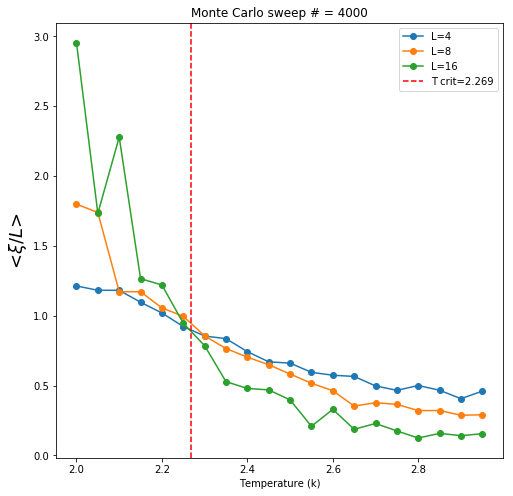

In [24]:
L_list = [4, 8, 16]
T_list = list(np.arange(2,3,0.05))

N_rnd = 4000
fig, axes = plt.subplots(1, 1, figsize=(8, 8))

Xi_L = np.zeros((len(L_list), len(T_list)))
for i, L in enumerate(L_list):
    print('L=%i' % L)
    
    Xi_L[i] = Ising_model.get_diff_T_cor_length(L, T_list, N_rnd)
    for j in range(len(Xi_L[i])):
        Xi_L[i][j] /= L
    
    axes.plot(T_list, Xi_L[i], '-o', label=('L=%i' % L))
    axes.set_ylabel(r'<$\xi/L$>', fontsize=18)
    axes.set_xlabel('Temperature (k)')
    axes.set_title('Monte Carlo sweep # = %i' % N_rnd)
    axes.legend()

T_c = 2/np.log(1+2**0.5)
plt.axvline(T_c, color='r', linestyle='--', label=('T crit=%.3f' % T_c))
plt.legend()
plt.savefig('Xi_L_and_T.png')
plt.show()